In [105]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [106]:
path = r'C:\Users\Bella\Desktop\Data Analytics\Achievement 4 - Python\09-24-2020-Instacart Basket Analysis'

In [107]:
customers_orders_products_combined = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'customers_orders_products_combined.csv'), index_col = False)

In [108]:
customers_orders_products_combined.head()

Unnamed: 0  user_id First Name_x  Surnam_x Gender_x     STATE_x  Age_x  \
0           0    26711      Deborah  Esquivel   Female    Missouri     48   
1           1    26711      Deborah  Esquivel   Female    Missouri     48   
2           2    26711      Deborah  Esquivel   Female    Missouri     48   
3           3    33890     Patricia      Hart   Female  New Mexico     36   
4           4    33890     Patricia      Hart   Female  New Mexico     36   

  date_joined  n_dependants fam_status_x  ... product_name aisle_id  \
0    1/1/2017             3      married  ...         Soda       77   
1    1/1/2017             3      married  ...         Soda       77   
2    1/1/2017             3      married  ...         Soda       77   
3    1/1/2017             0       single  ...         Soda       77   
4    1/1/2017             0       single  ...         Soda       77   

  department_id prices     busiest_day two_busiest_and_slowest_days max_order  \
0             7    9.0  Regularly busy                     Busy day         8   
1             7    9.0  Regularly busy               Regularly busy         8   
2             7    9.0  Regularly busy                     Busy day         8   
3             7    9.0  Regularly busy               Regularly busy         5   
4             7    9.0  Regularly busy                     Busy day         5   

            loyalty_flag  mean_price median_days_since_prior_order  
0       Regular customer        9.00                          11.0  
1       Regular customer        9.00                          11.0  
2       Regular customer        9.00                          11.0  
3  Non-frequent customer        9.65                          28.0  
4  Non-frequent customer        9.65                          28.0  

[5 rows x 38 columns]

In [109]:
# name, state and family status may be considered as PII.

In [110]:
#create region column

result = []

for value in customers_orders_products_combined['STATE_x']:
    if value == 'Maine' and 'New Hampshire' and 'Vermont' and 'Massachusetts' and 'Rhode Island' and 'Connecticut' and 'New York' and 'Pennsylvania' and 'New Jersey':
        result.append("Region 1")
    elif value == 'Wisconsin' and 'Michigan' and 'Illinois' and 'Indiana' and 'Ohio' and 'North Dakota' and 'South Dakota' and 'Nebraska' and 'Kansas' and 'Minnesota' and 'Iowa' and 'Missouri':
        result.append("Region 2")
    elif value == 'Delaware' and 'Maryland' and 'District of Columbia' and 'Virginia' and 'West Virginia' and 'North Carolina' and 'South Carolina' and 'Georgia' and 'Florida' and 'Kentucky' and 'Tennessee' and 'Mississippi' and 'Alabama' and 'Oklahoma' and 'Texas' and 'Arkansas' and 'Louisiana':
        result.append("Region 3")
    elif value == 'Idaho' and 'Montana' and 'Wyoming' and 'Nevada' and 'Utah' and 'Colorado' and 'Arizona' and 'New Mexico' and 'Alaska' and 'Washington' and 'Oregon' and 'California' and 'Hawaii':
        result.append("Region 4")
    else:
        result.append("Unknown")

In [111]:
result

['Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Region 4',
 'Region 4',
 'Region 4',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 

In [112]:
customers_orders_products_combined['Region']=result

In [113]:
customers_orders_products_combined['Region'].value_counts(dropna=False)

Unknown     484220
Region 1     10733
Region 3     10338
Region 2      9959
Region 4      9037
Name: Region, dtype: int64

In [114]:
customers_orders_products_combined

Unnamed: 0  user_id First Name_x  Surnam_x Gender_x     STATE_x  \
0                0    26711      Deborah  Esquivel   Female    Missouri   
1                1    26711      Deborah  Esquivel   Female    Missouri   
2                2    26711      Deborah  Esquivel   Female    Missouri   
3                3    33890     Patricia      Hart   Female  New Mexico   
4                4    33890     Patricia      Hart   Female  New Mexico   
...            ...      ...          ...       ...      ...         ...   
524282      524282    84609        Jerry   Camacho     Male     Wyoming   
524283      524283    85407      Raymond   Escobar     Male    Maryland   
524284      524284    85407      Raymond   Escobar     Male    Maryland   
524285      524285    85407      Raymond   Escobar     Male    Maryland   
524286      524286    85407      Raymond   Escobar     Male    Maryland   

        Age_x date_joined  n_dependants fam_status_x  ... aisle_id  \
0          48    1/1/2017             3      married  ...       77   
1          48    1/1/2017             3      married  ...       77   
2          48    1/1/2017             3      married  ...       77   
3          36    1/1/2017             0       single  ...       77   
4          36    1/1/2017             0       single  ...       77   
...       ...         ...           ...          ...  ...      ...   
524282     44    4/1/2020             3      married  ...       24   
524283     46    4/1/2020             0       single  ...       24   
524284     46    4/1/2020             0       single  ...       24   
524285     46    4/1/2020             0       single  ...       24   
524286     46    4/1/2020             0       single  ...       24   

       department_id prices     busiest_day  two_busiest_and_slowest_days  \
0                  7    9.0  Regularly busy                      Busy day   
1                  7    9.0  Regularly busy                Regularly busy   
2                  7    9.0  Regularly busy                      Busy day   
3                  7    9.0  Regularly busy                Regularly busy   
4                  7    9.0  Regularly busy                      Busy day   
...              ...    ...             ...                           ...   
524282             4    5.0     Busiest day                 Most busy day   
524283             4    5.0  Regularly busy                  Not busy day   
524284             4    5.0  Regularly busy                Regularly busy   
524285             4    5.0      Least busy                Least busy day   
524286             4    5.0  Regularly busy                      Busy day   

       max_order           loyalty_flag mean_price  \
0              8       Regular customer       9.00   
1              8       Regular customer       9.00   
2              8       Regular customer       9.00   
3              5  Non-frequent customer       9.65   
4              5  Non-frequent customer       9.65   
...          ...                    ...        ...   
524282         6  Non-frequent customer       5.00   
524283        28      Frequent customer       5.00   
524284        28      Frequent customer       5.00   
524285        28      Frequent customer       5.00   
524286        28      Frequent customer       5.00   

        median_days_since_prior_order   Region  
0                                11.0  Unknown  
1                                11.0  Unknown  
2                                11.0  Unknown  
3                                28.0  Unknown  
4                                28.0  Unknown  
...                               ...      ...  
524282                           23.0  Unknown  
524283                            4.5  Unknown  
524284                            4.5  Unknown  
524285                            4.5  Unknown  
524286                            4.5  Unknown  

[524287 rows x 39 columns]

In [115]:
# Determine whether there’s a difference in spending habits between the different U.S. region
crosstab = pd.crosstab(customers_orders_products_combined['mean_price'], customers_orders_products_combined['Region'], dropna = False)

In [116]:
crosstab.to_clipboard()

In [117]:
crosstab

Region      Region 1  Region 2  Region 3  Region 4  Unknown
mean_price                                                 
1.000000           3         2         6        10      380
1.377778           0         0         0         0        9
1.485714           0         0         7         0        0
1.566667           0         0         0         0        6
1.600000           0         0         0         0        5
...              ...       ...       ...       ...      ...
13.750000          0         0         0         0        6
13.782353          0         0         0         0       17
13.807692          0         0         0         0       26
13.864865          0         0         0         0       37
14.000000         90       104       138        67     4787

[4893 rows x 5 columns]

In [118]:
customers_orders_products_combined.columns

Index(['Unnamed: 0', 'user_id', 'First Name_x', 'Surnam_x', 'Gender_x',
       'STATE_x', 'Age_x', 'date_joined', 'n_dependants', 'fam_status_x',
       'First Name_y', 'Surnam_y', 'Gender_y', 'STATE_y', 'Age_y',
       'date_joined_x', 'fam_status_y', 'date_joined_y', 'order_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', '_merge', 'product_name', 'aisle_id', 'department_id',
       'prices', 'busiest_day', 'two_busiest_and_slowest_days', 'max_order',
       'loyalty_flag', 'mean_price', 'median_days_since_prior_order',
       'Region'],
      dtype='object')

In [120]:
customers_orders_products_combined['order_number'].max()

99

In [121]:
# Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the customers_orders_products_combined = customers_dataset.drop(columns = ['income','n_dependants'])
def activity_label(row):

  if row['order_number'] <= 5:
    return 'Low-active customer'
  else: return 'Regular customer'

In [122]:
# create new column 'exclusion flag'
customers_orders_products_combined['exclusion flag'] = customers_orders_products_combined.apply(activity_label, axis=1)

In [123]:
customers_orders_products_combined['exclusion flag'].value_counts(dropna = False)

Regular customer       392242
Low-active customer    132045
Name: exclusion flag, dtype: int64

In [124]:
customers_orders_products_combined['exclusion flag'].max()

'Regular customer'

In [125]:
# create profiling variable

def profile_var(row):
    if row['n_dependants'] >=2:
        return 'Young parent'
    elif row ['fam_status_x'] == 'single' and row['Age_x'] >=21:
        return 'Single adult'
    else: return 'Undefined'


In [126]:
customers_orders_products_combined['profiling flag'] = customers_orders_products_combined.apply(profile_var, axis=1)

In [127]:
customers_orders_products_combined['profiling flag'].value_counts(dropna = False)

Young parent    263316
Undefined       180992
Single adult     79979
Name: profiling flag, dtype: int64

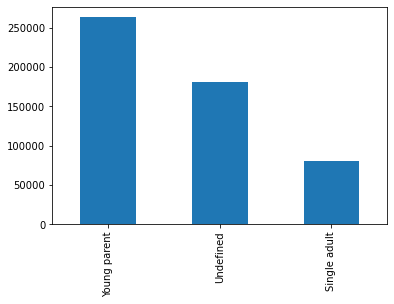

In [128]:
# create plot bar for profiling flag column
customers_orders_products_combined['profiling flag'].value_counts().plot.bar()

In [129]:
customers_orders_products_combined['profiling flag'].max()

'Young parent'

In [130]:
customers_orders_products_combined['profiling flag'].min()

'Single adult'

In [131]:
customers_orders_products_combined.to_csv(os.path.join(path, '02 Data','Prepared Data', 'customers_orders_products_combined.csv'))

In [132]:
customers_orders_products_combined.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'customers_orders_products_combined.pkl'))